# Setup

Look nice plotting:

In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

science libraries (using autograd instead of tensorflow for easy prototyping)

In [2]:
import autograd.numpy as np
import autograd.scipy as sp
from autograd import grad
from autograd.util import flatten_func
import seaborn as sns
import librosa
from importlib import reload
import matplotlib.pyplot as plt
from librosa.display import specshow
# display more of the array
np.set_printoptions(edgeitems=5)
from librosa.display import waveplot
from pathlib import Path

In [6]:
%%javascript
// install tone.js
require.config({
  paths: {
      tone: '//tonejs.github.io/CDN/latest/Tone'
  }
});
require(['tone'], (t)=>{window.Tone=t})

<IPython.core.display.Javascript object>

# Doing things

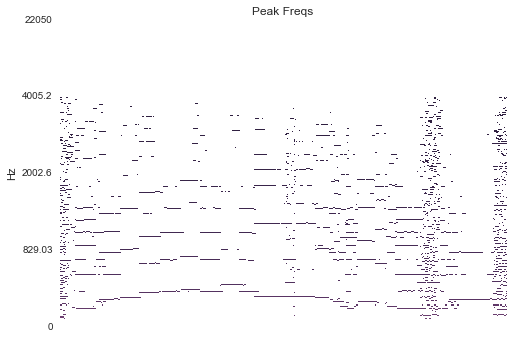

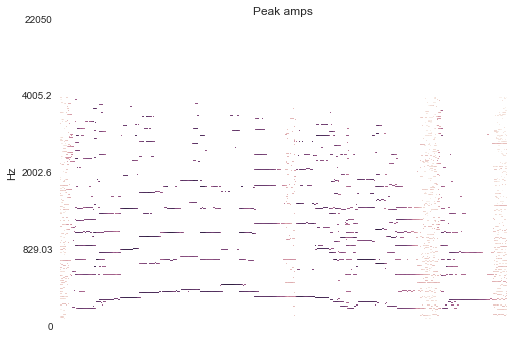

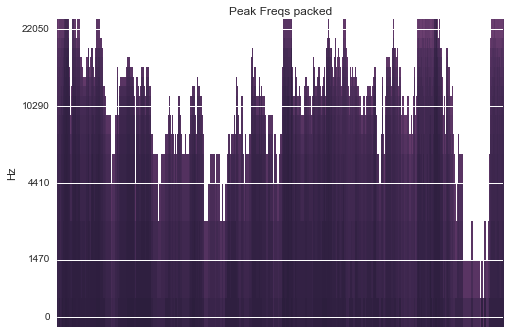

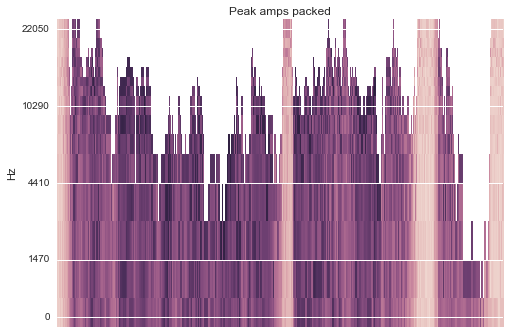

In [49]:
import src.danscriptors.array_ops as array_ops
import src.danscriptors.analysis as analysis
array_ops = reload(array_ops)
analysis = reload(analysis)
source_features = analysis.harmonic_index('samples/clarinet.mp3', debug=True, cached=False)



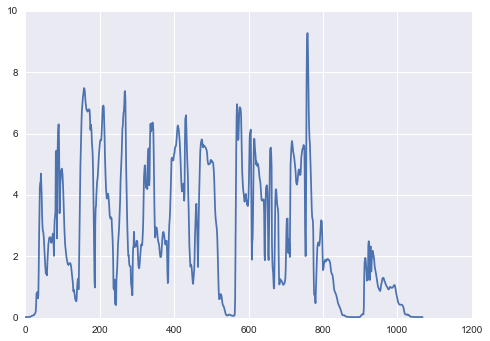

In [50]:
plt.plot(source_features['harm_rms'].ravel());

In [51]:
k=500
target_features = dict(
    rms=source_features['rms'][:, k],
    peak_f=source_features['peak_f'][:, k],
    peak_power=source_features['peak_power'][:, k],
)

In [47]:
target_features

{'peak_f': array([ 2347.95336914,  2056.60424805,  1763.6583252 ,  1174.62011719,
          881.91387939,   293.17218018,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ], dtype=float32),
 'peak_power': array([   545.89324951,   1182.26416016,    695.11029053,   1789.32507324,
         44836.06640625,   4432.76367188,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ], dtype=float32),
 'rms': array([ 6.3510747], dtype=float32)}

In [157]:
import src.danscriptors.resynthesis as resynthesis
resynthesis = reload(resynthesis)
optimum = resynthesis.harmonic_synthesis(source_features, target_features)
print(optimum)
import src.danscriptors.sc_play as sc_play
sc_play = reload(sc_play)
sc_play.file(str(Path('samples/clarinet.mp3').resolve()))
sc_play.note(**optimum)

{'rate': array([ 1.08649794,  1.00063106,  1.00191669,  1.00304011,  1.07782798,
        1.09642202,  1.00782603,  1.06176783]), 'start_sample': array([ 159744,  569344,   27648, 1035264,  730112,  818176, 1003520,
        200704]), 'start_time': array([  3.62231293,  12.91029478,   0.62693878,  23.47537415,
        16.55582766,  18.55274376,  22.75555556,   4.55111111]), 'gain': array([ 0.52939309,  0.        ,  0.        ,  0.        ,  0.39374712,
        0.5693328 ,  0.        ,  0.4203446 ]), 'start_frame': array([ 154,  554,   25, 1009,  711,  797,  978,  194])}


In [165]:
optimum = resynthesis.harmonic_synthesis(source_features, target_features)
# sc_play.file(str(Path('samples/clarinet.mp3').resolve()))
sc_play.note(**optimum)

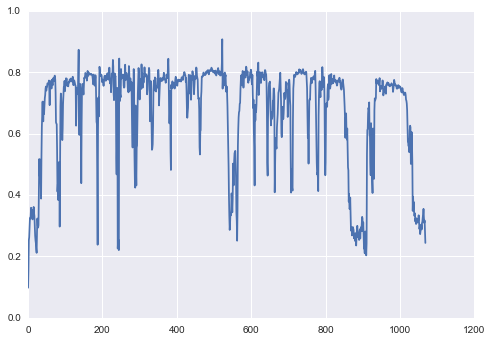

In [107]:
plt.plot((source_features['harm_rms']/source_features['rms']).ravel()); # noisiness 

In [ ]:
%%javascript
console.debug(Tone.Master)